In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import seaborn as sns

In [53]:
# Read both files
engage = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [54]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [55]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [56]:
len(users.object_id.unique())

12000

In [57]:
print('# Of Users: {}:'.format(len(engage.user_id.unique())))

# Of Users: 8823:


In [58]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [59]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


#### Preprocess

In [60]:
#convert time_stamp column to a datetime object

engage.time_stamp = pd.to_datetime(engage.time_stamp)

In [61]:
#sort values by the time_stamp column, so they are in chronological order
engage.sort_values(by = 'time_stamp', inplace = True)
engage.reset_index(inplace = True, drop = True)

In [62]:
engage.head()

,time_stamp,user_id,visited
0,2012-05-31 08:20:06,10012,1
1,2012-05-31 15:47:36,3428,1
2,2012-05-31 17:19:37,9899,1
3,2012-05-31 21:58:33,1693,1
4,2012-06-01 00:17:30,6102,1


In [63]:
#extract week and year from time_stamp
engage['week-year'] = engage['time_stamp'].dt.strftime('%U-%Y')

In [64]:
engage.head()

,time_stamp,user_id,visited,week-year
0,2012-05-31 08:20:06,10012,1,22-2012
1,2012-05-31 15:47:36,3428,1,22-2012
2,2012-05-31 17:19:37,9899,1,22-2012
3,2012-05-31 21:58:33,1693,1,22-2012
4,2012-06-01 00:17:30,6102,1,22-2012


In [65]:
usage = engage.groupby(['user_id', 'week-year']).size().reset_index().rename(columns={0:'count'})

In [67]:
usage['adopted'] = usage['count']>=3

In [68]:
adopted_users = list(usage[usage.adopted==True].user_id.unique())

In [69]:
users['adopted'] = users.object_id.apply(lambda x: x in adopted_users).astype(int)

In [72]:
users_new = users.drop(['name','email'],axis=1)
users_new = users_new.set_index('object_id')

In [73]:
users_new.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [74]:
#One-hot encoding of creation_source
source_dummies = pd.get_dummies(users_new.creation_source,drop_first=True)
df_final = pd.concat([users_new,source_dummies],axis=1)

#drop original column
df_final = df_final.drop(['creation_source'],axis=1)#One-hot encoding of creation_source. Drop first to avoid multicollinearity
source_dummies = pd.get_dummies(users_clean.creation_source,drop_first=True)
df_final = pd.concat([users_new,source_dummies],axis=1)


df_final = df_final.drop(['creation_source'],axis=1)

In [75]:
df_final.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,1.398139e+09,1,0,11,10803.0,0,0,0,0,0
2,2013-11-15 03:45:04,1.396238e+09,0,0,1,316.0,0,1,0,0,0
3,2013-03-19 23:14:52,1.363735e+09,0,0,94,1525.0,0,1,0,0,0
4,2013-05-21 08:09:28,1.369210e+09,0,0,1,5151.0,0,0,0,0,0
5,2013-01-17 10:14:20,1.358850e+09,0,0,193,5240.0,0,0,0,0,0


In [76]:
#Convert creation_time and last_session_creation_time to datetime
df_final.creation_time = pd.to_datetime(df_final.creation_time)
df_final.last_session_creation_time = pd.to_datetime(df_final.last_session_creation_time,unit='s')

In [77]:
#Extract months from datetime columns.
df_final['creation_month'] = df_final.creation_time.dt.month

df_final['last_session_creation_month'] = df_final.last_session_creation_time.dt.month



In [78]:
# convert invited by user_id
df_final['invited'] = df_final.invited_by_user_id.notnull().astype(int)

In [79]:
# Drop redundant columns 
df_final = df_final.drop(['creation_time','last_session_creation_time','invited_by_user_id'],axis=1)

In [80]:
# Check
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   opted_in_to_mailing_list     12000 non-null  int64  
 1   enabled_for_marketing_drip   12000 non-null  int64  
 2   org_id                       12000 non-null  int64  
 3   adopted                      12000 non-null  int64  
 4   ORG_INVITE                   12000 non-null  uint8  
 5   PERSONAL_PROJECTS            12000 non-null  uint8  
 6   SIGNUP                       12000 non-null  uint8  
 7   SIGNUP_GOOGLE_AUTH           12000 non-null  uint8  
 8   creation_month               12000 non-null  int64  
 9   last_session_creation_month  8823 non-null   float64
 10  invited                      12000 non-null  int64  
dtypes: float64(1), int64(6), uint8(4)
memory usage: 796.9 KB


(-1.1030824043739522,
 1.1001467873071873,
 -1.1071661711770648,
 1.1063237193651299)

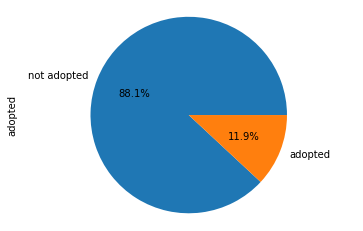

In [85]:
# Fill nullss
df_final['last_session_creation_month'] = df_final['last_session_creation_month'].fillna(0).astype(int)


df_final.adopted.value_counts().plot(kind='pie',labels=['not adopted','adopted'],autopct='%1.1f%%')
plt.axis('equal')

In [83]:
# Machine Learning

In [87]:
#Split target variable
X = df_final.drop(['adopted'], axis = 1)
y = df_final['adopted']

<AxesSubplot:>

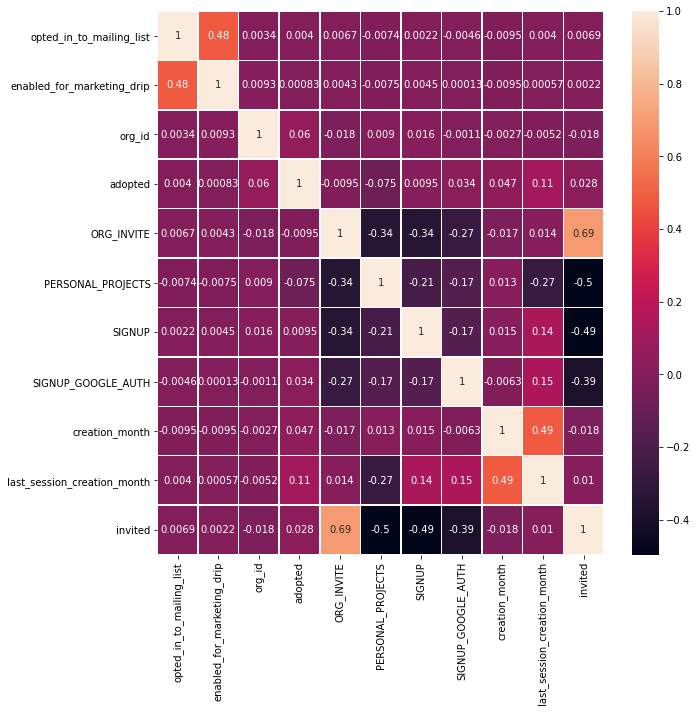

In [92]:
# Preliminary heatmap

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_final.corr(), annot=True, linewidths=.5, ax=ax)

In [93]:
# Strong correlation belong to last session creation month but not significant

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
#Split data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [105]:

# instantiate model to run 50 estimators
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

#Cross-validate on training set
cv_accuracy_rf = cross_val_score(rf_model, X_train, y_train, cv=5,scoring='f1')

# train model
rf_model.fit(X_train, y_train)

# predict on test data
y_pred_rf = rf_model.predict(X_test)

In [106]:
# Evaluation
print("Train Accuracy:",format(np.mean(cv_accuracy_rf),'.5f'))
print("Test Accuracy:",format(metrics.accuracy_score(y_test, y_pred_rf),'.5f'))
cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_rf),
             columns = ['Predicted 0','Predicted 1'],
             index=['Actual 0','Actual 1'])
print('Confusion Matrix: ')
print(cnf_matrix)
print(classification_report(y_test, y_pred_rf))

Train Accuracy: 0.77891
Test Accuracy: 0.95472
Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0         3108           62
Actual 1          101          329
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3170
           1       0.84      0.77      0.80       430

    accuracy                           0.95      3600
   macro avg       0.90      0.87      0.89      3600
weighted avg       0.95      0.95      0.95      3600



In [103]:
 #instantiate model to run 50 estimators
gb_model = GradientBoostingClassifier(random_state=42)

#Cross-validate on training se=-809\p
cv_accuracy_gb = cross_val_score(gb_model, X_train, y_train, cv=5,scoring='f1')

# train model
gb_model.fit(X_train, y_train)

# predict on test data
y_pred_gb = gb_model.predict(X_test)

In [107]:
# Evaluation
print("Train Accuracy:",format(np.mean(cv_accuracy_gb),'.5f'))
print("Test Accuracy:",format(metrics.accuracy_score(y_test, y_pred_gb),'.5f'))
cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_gb),
             columns = ['Predicted 0','Predicted 1'],
             index=['Actual 0','Actual 1'])
print('Confusion Matrix: ')
print(cnf_matrix)
print(classification_report(y_test, y_pred_gb))

Train Accuracy: 0.80339
Test Accuracy: 0.96139
Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0         3132           38
Actual 1          101          329
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3170
           1       0.90      0.77      0.83       430

    accuracy                           0.96      3600
   macro avg       0.93      0.88      0.90      3600
weighted avg       0.96      0.96      0.96      3600



In [108]:
# Slightly higher score on xgboost model looking at f1 score precision and recall.
# Look at feature importances to figure out the most important attributes as it was asked

<AxesSubplot:>

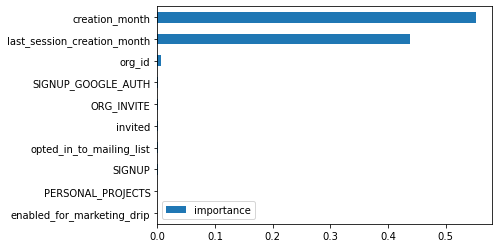

In [109]:
feature_importances = pd.DataFrame(gb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

feature_importances.plot(kind='barh')